In [1]:
from deepface import DeepFace
from os import path
from glob import glob
from random import choice
from IPython.display import display
from matplotlib import pyplot as plt
import cv2

2024-08-09 10:08:42.293528: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 10:08:42.295000: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 10:08:42.302756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 10:08:42.330059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 10:08:42.376507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
p_db = "/media/manjunath/Data/Datasets/Face-Recognition/lfw-sample"
p_person_dirs = [ x for x in glob(path.join(p_db, "*")) if path.isdir(x) ]
model_name = "VGG-Face"
# model_name = "OpenFace"
# model_name = "DeepFace"

In [3]:
p_person = choice(p_person_dirs)
print(f"p_person={path.basename(p_person)}")
while True:
    p_rand_img = choice(glob(path.join(p_person, "*.jpg")))
    print(f"p_rand_img={path.basename(p_rand_img)}")
    try:
        dfs = DeepFace.find(img_path = p_rand_img, db_path = p_db, model_name = model_name)
        break
    except ValueError as e:
        print("Error: Face not found")
print('Entries:', len(dfs))
df = dfs[0]
disp_df = df.copy(deep=True)
disp_df["identity"] = [ path.basename(x) for x in disp_df["identity"] ]
display(disp_df[["identity", "distance"]])

p_person=Paul_Bremer
p_rand_img=Paul_Bremer_0002.jpg
24-08-09 10:08:50 - Searching /media/manjunath/Data/Datasets/Face-Recognition/lfw-sample/Paul_Bremer/Paul_Bremer_0002.jpg in 107 length datastore


2024-08-09 10:08:51.436748: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


24-08-09 10:08:55 - find function duration 5.603162527084351 seconds
Entries: 1


,identity,distance
0,Paul_Bremer_0002.jpg,0.000000
1,Paul_Bremer_0006.jpg,0.470411
2,Paul_Bremer_0001.jpg,0.523848
3,Paul_Bremer_0019.jpg,0.549997
4,Paul_Bremer_0013.jpg,0.571293
5,Paul_Bremer_0005.jpg,0.576447
6,Paul_Bremer_0012.jpg,0.578957
7,Paul_Bremer_0011.jpg,0.592387
8,Paul_Bremer_0020.jpg,0.592514
9,Paul_Bremer_0007.jpg,0.598520


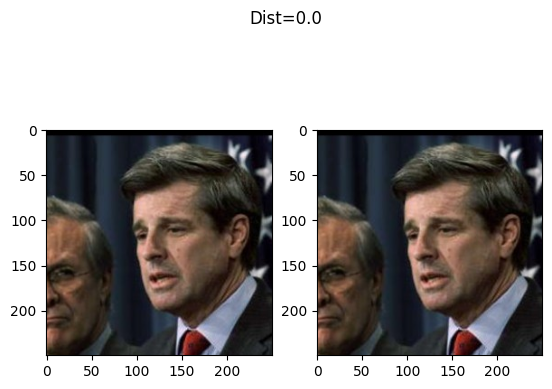

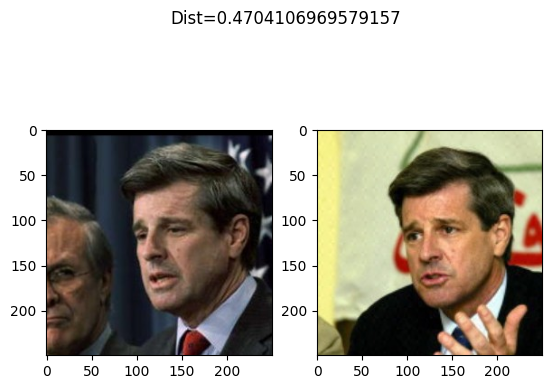

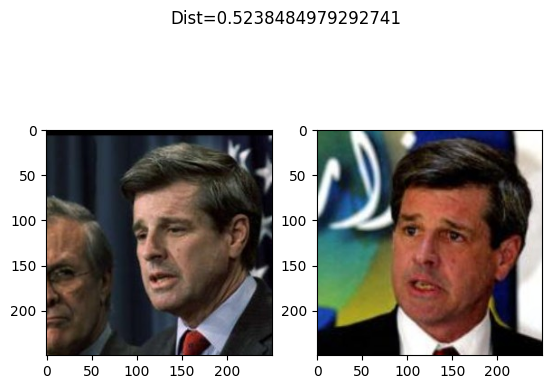

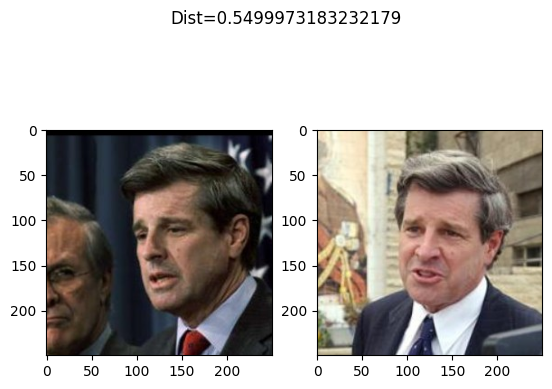

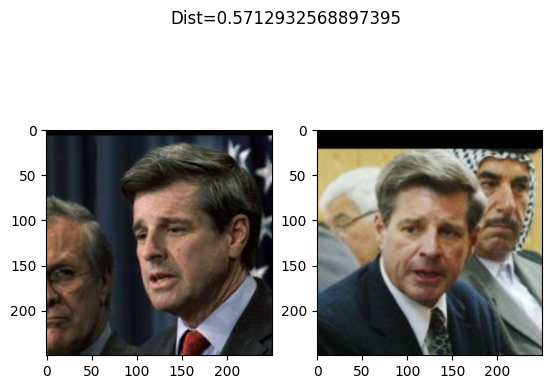

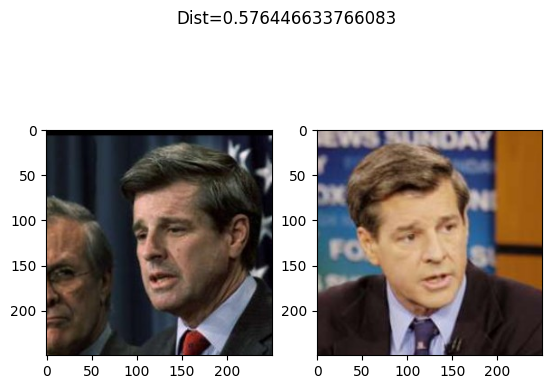

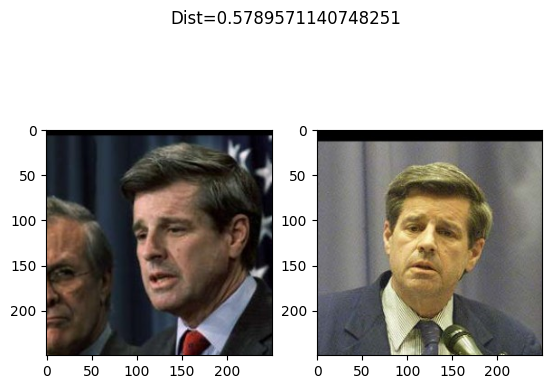

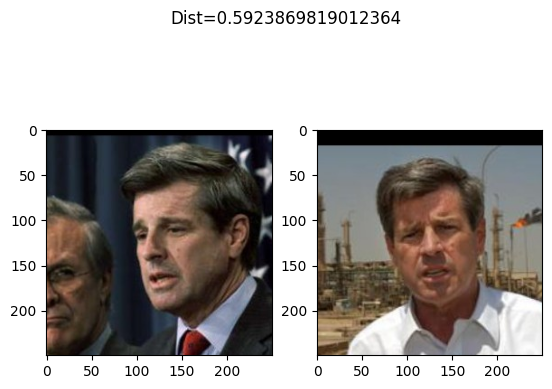

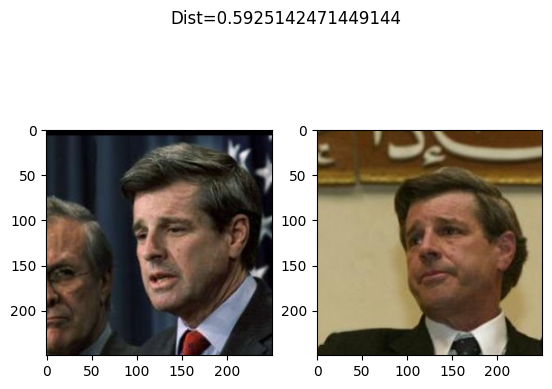

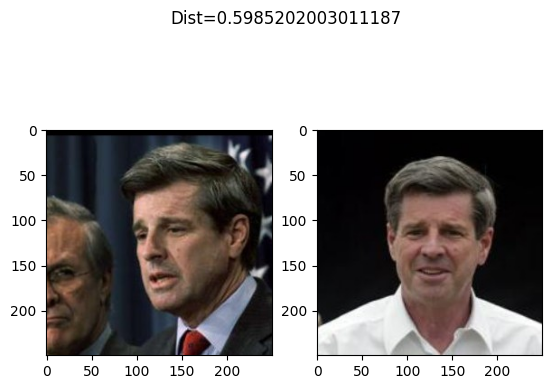

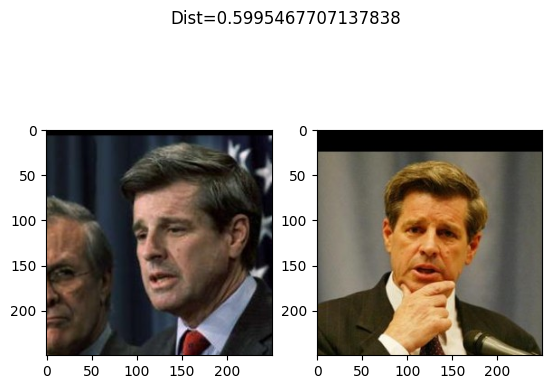

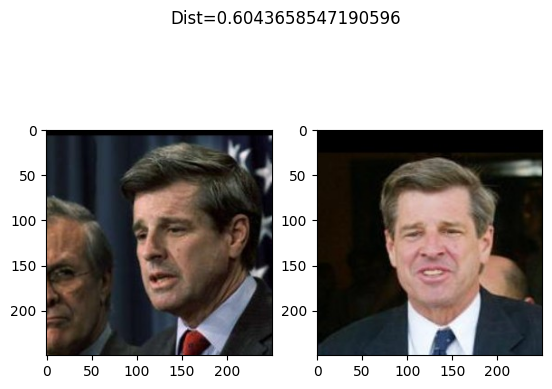

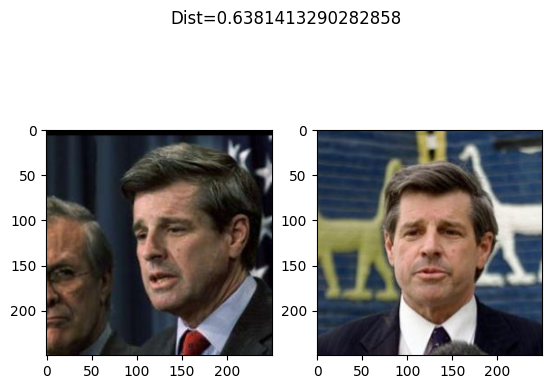

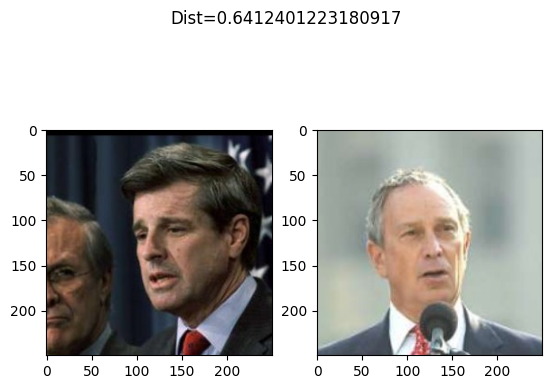

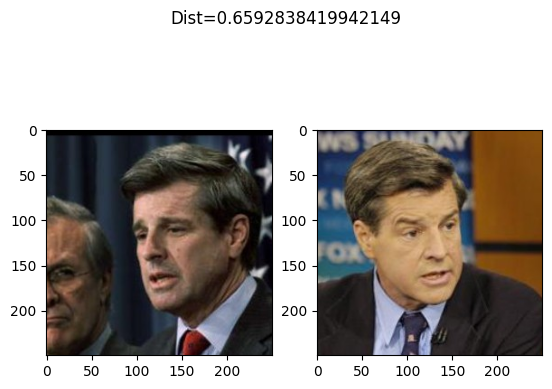

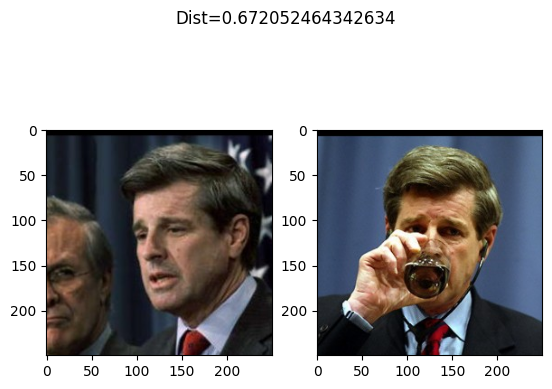

In [4]:
def read_img(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

src_img = read_img(p_rand_img)
for img_path, dist in zip(df['identity'], df['distance']):
    tgt_img = read_img(img_path)
    f, axes = plt.subplots(1,2)
    f.suptitle(f"Dist={dist}")
    axes[0].imshow(src_img)
    axes[1].imshow(tgt_img)

In [5]:
embedding_objs = DeepFace.represent(img_path = p_rand_img, model_name = model_name)
for face in embedding_objs:
    embedding = face['embedding']
    facial_area = face['facial_area']
    conf = face['face_confidence']
    print(f"Embedding: {len(embedding)}")
    print(f"Facial Area: {facial_area}")
    print(f"Face Conf: {conf}")

Embedding: 4096
Facial Area: {'x': 70, 'y': 71, 'w': 109, 'h': 109, 'left_eye': None, 'right_eye': None}
Face Conf: 0.93
